
# Difference Parameters and Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf

## <u>Case Study 1</u>: College Volleyball

One of your classmates posed the following question at the beginning of the semester: Is there a home court advantage for volleyball?  In this case study, we will assess whether the data supports the idea of a home court advantage for the population of all home and all away volleyball matches.

We will define our population of interest as all women's NCAA Division 1 volleyball matches played for the season from this academic year (2022).

## 1. Home Court Advantage for Winning

In our recent statistical terms, one way to formalize this question is as: is there an association between winning a match and whether the match is played at home for volleyball matches?

We will let $p_1$ represent the proportion of all home volleyball matches that are won and $p_2$ represent the proportion of all away volleyball matches that are won.

Recall our question of interest: Is there a home court advantage for volleyball?  In other words, is a team more likely to win if a match is played at home compared to if a match is played away?

**a)** Define the hypotheses for this situation.  We will assume a significance level $\alpha$ of $0.25$.

$H_0 : p_1 - p_2 = 0$

$H_1 : p_1 - p_2 > 0$

**b)** The following table provides sample data for women's volleyball matches, where the sample is the results of the current season for the University of Illinois women's volleyball team.

| Outcome | Home | Away |
| ------- | ---- | ---- |
| Wins    | 6    | 7    |
| Losses  | 4    | 8    |

Check the conditions that would need to be met for the standard hypothesis test procedure to be valid.

In [2]:
# match played at home
n_1 = 10
p_1 = 6 / 10
# match played away
n_2 = 15
p_2 = 7 / 15
# proportion of volleyball games that are won
sample_proportion = (6+7) / (10+15)
sample_proportion

0.52

In [3]:
print(n_1 * sample_proportion >=10)
print(n_1 * (1 - sample_proportion)>=10)
print(n_2 * sample_proportion >=10)
print(n_2 * (1 - sample_proportion)>=10)

False
False
False
False


1. $n_1p_1\approx n_1\hat{p}=10(.52)< 10$ and $n_1(1-p_1)\approx n_1(1-\hat{p})=10(1-.52)< 10$
2. $n_2p_2\approx n_2\hat{p}=15(.52)< 10$ and $n_2(1-p_2)\approx n_2(1-\hat{p})=15(1-.52)< 10$
3. Sample of matches played home is randomly selected and $n_1=10<10$% of all home volleyball matches. 
4. Sample of matches played away is randomly selected and $n_2=15<10$% of all away volleyball matches. 
5. Sample of home matches is independent of sample of away matches.

**c)** Are the conditions in part b met, so that the results of a hypothesis test would be valid?

The samples are independent and randomly samples. (condition 3, 4, and 5)

However, the conditions for central limit theorem is not met. (condition 1 and 2)

**d)** Regardless of your answer in part b & c, we will perform the hypothesis test according to our standardard (or traditional) procedure.

Calculate the test statistic for this scenario.  Then, calculate the *p*-value.

In [4]:
point_estimate=p_1-p_2
print('Point Estimate:', point_estimate)

Point Estimate: 0.1333333333333333


In [7]:
standard_error = np.sqrt(sample_proportion*(1-sample_proportion)/n_1 + sample_proportion*(1-sample_proportion)/n_2)
print('Standard Error:', standard_error)

Standard Error: 0.2039607805437114


In [8]:
test_statistic = (point_estimate - 0) / standard_error
print('Test Statistic:', test_statistic)

Test Statistic: 0.6537204504606133


In [9]:
p_value = 1 - norm.cdf(test_statistic)
print('p value:', p_value)

p value: 0.25664596265164485


**e)** Based on your *p*-value, what decision is suggested by the sample data?

In [10]:
p_value < 0.25

False

Because p value is 0.2566 > $\alpha = 0.25$, I reject null hypothesis. Thus I have sufficient evidence to suggest that $p_1 - p_2 > 0$ (or in other words team is more likely to win when played home.)

## 2. An Alternate Hypothesis Test Procedure 

Consider the results from parts b and c in Question 1.  Did they introduce any concerns about the validity of your hypothesis test procedure?

In case you did have concerns, we will consider an alternate approach that could be taken to hypothesis testing that loosens the distributional requirements.  We can use this regardless of any concerns surrounding the assumptions.

**a)** Consider the null hypothesis.  If the null hypothesis were true, what would our estimate for the common population proportion be?

In [12]:
common_pop_p = 0.5

**b)** Assuming that the null hypothesis is true, we are going to simulate the possible values for $\hat{p}_1-\hat{p}_2$.  

To do this, use the appropriate distribution to simulate the number of wins that a team might have out of the number of home matches played.  Then, use the appropriate distribution to simulate the number of wins that a team might have out of the number of away matches.  Using this new data, estimate the difference in proportions for this simulated sample.

You should then repeat this process many times, until we have repeated 800 values for the difference in sample proportions.  This is our estimated (or simulated) sampling distribution.

*Hint*: You may want to check Case Study 1 of Lab 8 for a hint about simulating a new sample from a hypothesis for parameters.

In [13]:
# the number of wins that a team might have out of the number of home matches played
# binomial distribution with parameter n_1 and p_1
home = binom.rvs(n_1, p_1, random_state = 10)
p1 = home / n_1

# the number of wins that a team might have out of the number of away matches played
# binomial distribution with parameter n_2 and p_2
away = binom.rvs(n_2, p_2, random_state = 10)
p2 = away / n_2

print(p1, p2)

0.5 0.5333333333333333


In [14]:
diff = []

for i in range(800):
    home = binom.rvs(n_1, p_1)
    p1 = home / n_1
    away = binom.rvs(n_2, p_2)
    p2 = away / n_2
    
    difference = p1 - p2
    
    diff.append(difference)
    

df = pd.DataFrame({"difference": diff})
df

,difference
0,0.200000
1,0.300000
2,0.200000
3,0.333333
4,0.200000
...,...
795,0.100000
796,0.100000
797,0.433333
798,0.200000


**c)** Generate a histogram for the simulated sampling distribution.  Describe this histogram.

Text(0.5, 1.0, 'Difference in sample proportions of home and away matches')

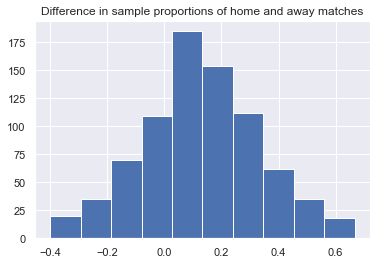

In [15]:
df['difference'].hist()
plt.title('Difference in sample proportions of home and away matches')

This histogram's shape is unimodal and look normaly distributed(symmetric). It's center seems to be on a value of 0.1. 

**d)** From the simulated sampling distribution, obtain a *p*-value.  That is, what proportion of simulated values from our simulated sampling distribution are as extreme or more extreme than what we observed from our real sample, assuming that the null hypothesis is true?

In [34]:
( df['difference'] > test_statistic  ).mean() + ( df['difference'] < -test_statistic ).mean()

0.0025

**e)** Based on your hypothesis test results, what **conclusion** would you make about our hypotheses at a significance level of $0.25$?

Because p value is 0.0025 < $\alpha = 0.25$, I fail to reject null hypothesis. Thus I do not have sufficient evidence to suggest that $p_1 - p_2 > 0$ (or in other words I can't suggest that team is more likely to win when played home.)

**f)**  Compare your *p*-values from 1e (the traditional method) and from 2d (the simulation-based method).  How similar are they?

p values form two methods are quite different. p value from 1e is much larger than p value from 2d. 

## 3. Volleyball Points Scored 

In Questions 1 and 2, you explored whether we have data to support a home court advantage for winning a match for NCAA D1 women's volleyball.  Can we think of the home court advantage as applying only to winning a match, or does it also affect game play on a play-by-play basis?  To answer this question, we will explore if or how home court advantage extends to the number of kills, which can be thought of as "earned points" by a volleyball team.

Our population of interest will be all NCAA Division 1 women's volleyball sets for the 2022 season.  

To answer this question, we will calculate a 99% confidence interval for the difference in population means, $\mu_1 - \mu_2$, where $\mu_1$ is defined as the population mean kills for home volleyball sets, and $\mu_2$ is defined as the population mean kills for away volleyball sets.

**a)** Read in the data in the vball.csv file included with this assignment.  

There are no missing values for our variables of interest.

Each row contains information about a set of volleyball played by Illinois for the 2022 season.  We will use the variables "Location" and "K" for our analysis.  Location records whether the set was played at an Away, Home, or Neutral location.  K records the number of kills by Illinois for that set. 

In [35]:
volleyball = pd.read_csv('vball.csv')
volleyball

,Opponent,Set,Location,Overall Result,Result,K,E,TA,Sideout_Won,Sideout_Attempt,Score,Opp_Score,Opp_K,Opp_E,Opp_TA,Opp_SO_Won,Opp_SO_Attempt
0,Georgia Tech,1,Neutral,L,L,14,6,33,13.0,25.0,21,25,16,7,37,13.0,21.0
1,Georgia Tech,2,Neutral,NaN,L,13,5,26,13.0,24.0,15,25,13,0,22,14.0,16.0
2,Georgia Tech,3,Neutral,NaN,L,9,8,36,15.0,25.0,17,25,9,6,28,15.0,17.0
3,Ole Miss,1,Away,W,W,13,4,24,14.0,17.0,25,16,10,8,31,13.0,24.0
4,Ole Miss,2,Away,NaN,W,17,7,33,14.0,24.0,26,24,13,5,28,14.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Indiana,3,Away,NaN,W,16,6,45,14.0,21.0,25,21,13,5,43,14.0,25.0
105,Indiana,4,Away,NaN,L,13,4,30,15.0,25.0,20,25,17,2,29,15.0,20.0
106,Northwestern,1,Away,L,L,11,3,30,15.0,25.0,24,26,17,5,32,16.0,25.0
107,Northwestern,2,Away,NaN,L,10,7,33,13.0,25.0,17,25,9,4,26,13.0,17.0


**b)** We will assume that all conditions for this confidence interval are met, and thus that the confidence interval we calculate will be valid.

Calculate by hand the 99% confidence interval for $\mu_1 - \mu_2$.

In [41]:
home_kill_mean = volleyball[volleyball['Location'] == 'Home']['K'].mean()
away_kill_mean = volleyball[volleyball['Location'] == 'Away']['K'].mean()
estimate = home_kill_mean - away_kill_mean
print('Estimate: ', estimate)

Estimate:  0.19683834778174258


In [42]:
std_home = volleyball[volleyball['Location'] == 'Home']['K'].std()
std_away = volleyball[volleyball['Location'] == 'Away']['K'].std()

n_home = volleyball[volleyball['Location'] == 'Home']['K'].count()
n_away = volleyball[volleyball['Location'] == 'Away']['K'].count()

standard_error=np.sqrt((std_home**2)/n_home + (std_away**2)/n_away)

print('Standard Error: ', standard_error)

Standard Error:  0.6882406448195547


In [40]:
# we know standard deviation of population - use normal distribution

critical_value = norm.ppf(1-((1-.99)/2))
critical_value

2.5758293035489004

In [43]:
upper_bound = estimate + critical_value * standard_error
lower_bound = estimate - critical_value * standard_error

print('99% Confidence Interval:', lower_bound,upper_bound)

99% Confidence Interval: -1.5759520730378571 1.9696287686013423


**c)** Interpret your confidence interval.  That is, put your confidence interval into words.

I am 99% confident that the difference in population means for home and away kills is contained in the interval (-1.5760, 1.9696). 

<hr>

## <u>Case Study 2</u>: Real Instagram Accounts

In our next case study we would like to explore the relationship between the number of accounts that *real accounts* follow and the number of accounts that follow them. We will use the **fake_insta_cleaned.csv** dataframe for this analysis. This csv file is very similar to the fake_insta.csv file that we have been using in the past, except we have removed many of the outlier observations ahead of time.

### Installation Note

You may need to run the following command in your anaconda command prompt in order to use the **statsmodel** packages that were discussed in class.

    conda install -c conda-forge statsmodels


## 4. A First Look at Our Data 

**a)** First, read the fake_insta_cleaned.csv file into a dataframe. Then create a dataframe that is comprised of just the real accounts.

In [46]:
insta = pd.read_csv('fake_insta_cleaned.csv')
real_accounts = insta[insta['account_type'] == 'real']

**b)** Next, create a scatterplot that visualizes the relationship between the number of followers and number of follows of real accounts in this dataset. Have this plot display a best fit line for the points as well.

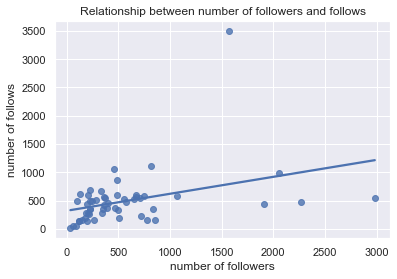

In [48]:
sns.regplot(x='number_of_followers', y='number_of_follows', data=real_accounts, ci=False)
plt.xlabel('number of followers')
plt.ylabel('number of follows')
plt.title('Relationship between number of followers and follows')
plt.show()

**c)** Calculate the covariance and the correlation of these two numerical variables.

In [60]:
real_accounts[['number_of_followers', 'number_of_follows']].cov()

,number_of_followers,number_of_follows
number_of_followers,343550.510133,103036.028651
number_of_follows,103036.028651,233827.080363


In [62]:
cov = real_accounts[['number_of_followers', 'number_of_follows']].cov().iloc[0,1]
cov

103036.0286512928

In [57]:
real_accounts[['number_of_followers', 'number_of_follows']].corr()

,number_of_followers,number_of_follows
number_of_followers,1.000000,0.363535
number_of_follows,0.363535,1.000000


In [58]:
corr = real_accounts[['number_of_followers', 'number_of_follows']].corr().iloc[0,1]
corr

0.3635351499452435

## 5. Simple Linear Regression - Model Fitting 

We would like to fit a simple linear regression model that predicts the number of accounts that a **real** Instagram account will be *followed by* (i.e. number of followers) given the number of accounts that they *follow* (i.e. number of follows).

**a)**  First, fit this simple linear regression model and display the summary output tables.

In [65]:
results = smf.ols('number_of_followers ~ number_of_follows', data=real_accounts).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     number_of_followers   R-squared:                       0.132
Model:                             OLS   Adj. R-squared:                  0.115
Method:                  Least Squares   F-statistic:                     7.919
Date:                 Fri, 31 Mar 2023   Prob (F-statistic):            0.00689
Time:                         10:55:18   Log-Likelihood:                -416.46
No. Observations:                   54   AIC:                             836.9
Df Residuals:                       52   BIC:                             840.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           343.3059    106.893      3.212      0.002     128.809     557.803
number_of_follows     0.4407      0.157      2.814      0.007       0.126       0.755
==============================================================================
Omnibus:                       50.398   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.558
Skew:                           2.687   Prob(JB):                     2.53e-42
Kurtosis:                      10.500   Cond. No.                         973.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**b)** Next, write out your ordinary least squares simple linear regression equation. Make sure you use the appropriate notation discussed in class. Put your variables into words.

(estimate  of  number  of  followers) = 0.4407 * (number of follows) + 343.3059 

**c)**  Put your fitted slope into words.  That is, interpret your slope.

As number of follows for a real instagram account increases by 1, an estimate number of followers would increase about 0.44. 

**d)** Kim Kardashian follows 153 people on Instagram. Predict how many followers she has.

In [68]:
predict = 0.4407 * 153 + 343.3059
print('It is predicted that she has ', predict, ' followers.')

It is predicted that she has  410.733  followers.


**e)** Kim Kardashian *actually* has about 258,000,000 followers. Calculate the residual of our prediction for Kim Kardashian.

In [69]:
residual = 258000000 - predict 
print('residual : ', residual)

residual :  257999589.267
